# Housing Price Analysis  using Linear Regression


# Content 

This project involves the analysis of housing prices in King County, Washington, employing linear regression. The dataset utilized for this analysis is sourced from Kaggle, providing comprehensive information on homes sold in the region between May 2014 and May 2015. The dataset encompasses 21 columns, each capturing distinct attributes related to the housing transactions.
<br><br>
1. id : A notation for a house<br>
2. date : Date the house was sold<br>
3. price : Price of the house<br>
4. bedrooms : Number of bedrooms<br>
5. bathrooms : Number of bathrooms<br>
6. sqft_living : Square footage of the home<br>
7. sqft_lot : Square footage of the lot<br>
8. floors : Total floors in the house<br>
9. waterfront : House with the waterfront view<br>
10. view : Has been viewed<br>
11. condition : overall condition oh house<br>
12. grade : Grade given to the housing unit, based on King County grading system<br>
13. sqft_above :Square footage of house apart from basement<br>
14. sqft_basement : Square footage of the basement<br>
15. yr_built : Year when the house was built<br>
16. yr_renovated : Year when house was renovated<br>
17. zipcode : Zip code<br>
18. lat : Latitude coordinate<br>
19. long : Longitude coordinate<br>
20. sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area<br>
21. sqft_lot15 : LotSize area in 2015(implies-- some renovations)<br><br>


The workflow for this analysis comprises the following key steps:<br><br>

**Exploratory Data Analysis (EDA):**<br>
Gain insights into the dataset by exploring its features and distributions.<br> 

**Data Cleaning:**<br>
Address any inconsistencies or missing values in the dataset to ensure data integrity and prepare it for modeling.<br>

**Outlier Detection:**<br>
Identify and handle outliers within the dataset. <br>

**Build and train a linear regression model:**<br>
The goal is to establish a predictive model for housing prices.<br>

**Model Evaluation:**<br>
Assess the performance of the linear regression model through appropriate evaluation metrics. This step ensures that the model provides accurate predictions and generalizes well to new data.<br>

**Visualization of Results:**<br>
Present the findings and insights derived from the linear regression model in a visually comprehensible manner.



# Part 1: Import Data and Explore


Let's initiate Exploratory Data Analysis (EDA) by reading and summarizing the data. To facilitate this analysis, we will import and utilize relevant libraries.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error



The dataset is in csv format. We will use pandas to convert the dataset into pandas dataframe and let's give it a name 'housing_data'.

In [2]:
housing_data = pd.read_csv('KingCounty_house_data.csv')
housing_data.shape


(21613, 21)

Our dataset contains 21613 rows and 21 columns. 

In [3]:
housing_data.head(5)




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
housing_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Now, let's see if our columns has missing values.

In [6]:
housing_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Upon observation, it is evident that none of the columns in our dataset contain missing values, as the sum of null values across all columns is zero. This absence of missing values simplifies our analytical task.

Now, before proceeding further, let's examine the dataset to determine if any duplicate data entries are present.

In [7]:
housing_data.duplicated().sum()


np.int64(0)

It seems like our data does not contain any duplicate data.

Now, let's generate a statistical summary for the given parameters using the pd.describe() method.


In [8]:
housing_data.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Now, as a final step of our data exploration, let's plot the geographic plot.

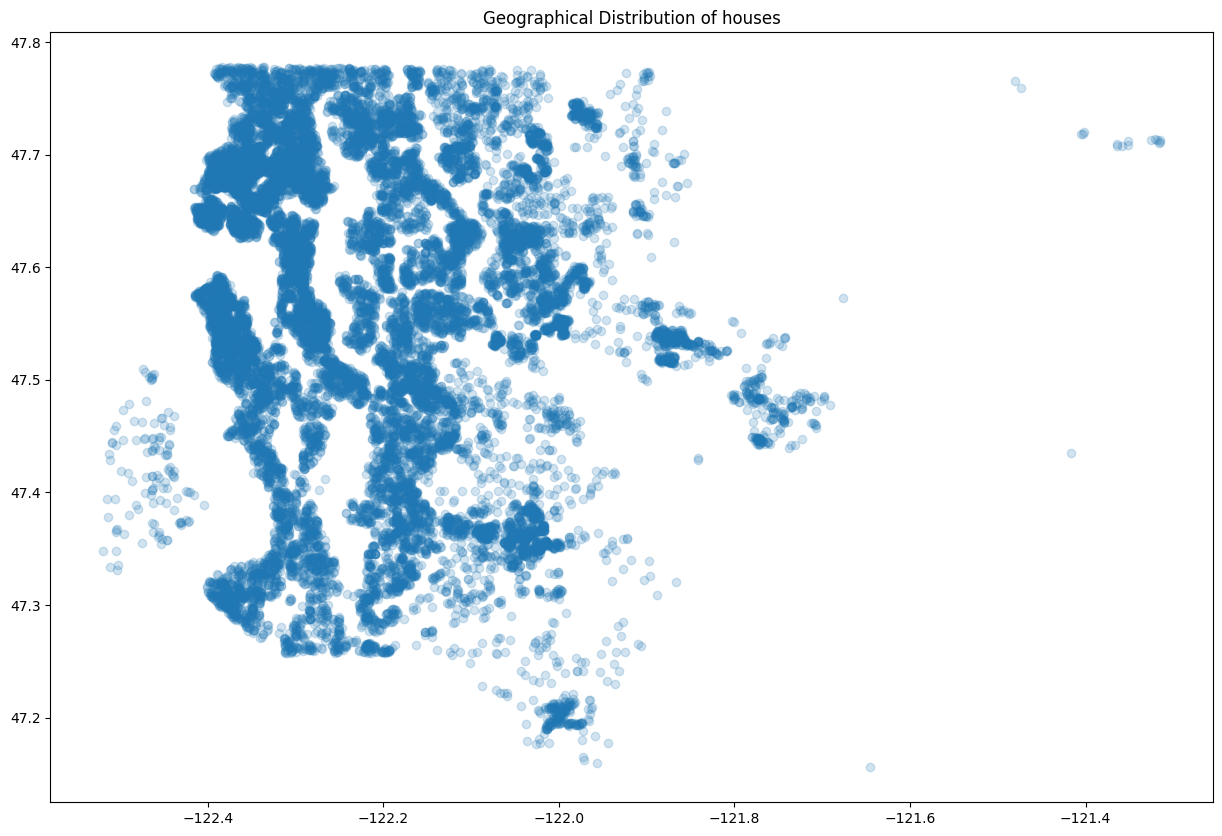

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(housing_data['long'],housing_data['lat'], alpha=0.2)
plt.title("Geographical Distribution of houses")
plt.show()

# Data Cleaning

Since the column 'id' is not so important for the analysis, let's get rid of this. We can see that the date is in object type. Lets convert it into datetime.

In [10]:
housing_data = housing_data.drop(columns='id')

In [11]:
housing_data['date'] = pd.to_datetime(housing_data['date'])
housing_data.head(5)



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In the **'yr_renovated'** column, a non-zero value represents the year when a house was renovated, while a 0 indicates no renovation. To simplify this information, let's create a new column named 'renovated,' where 0 signifies 'no renovation' and 1 signifies 'renovated.'

In [12]:
housing_data['renovated'] = housing_data['yr_renovated'].apply(lambda x : 1 if x != 0 else 0)
housing_data.head(2)



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1


In [13]:
housing_data = housing_data.drop(columns='yr_renovated')
housing_data.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,0


# Part 2: Analysis


# Correlation between the parameters

In the analysis phase, my focus is on examining the relationships between the target variable, which is the 'price,' and the other variables present in our dataset. I intend to include only those variables that exhibit a strong correlation with the price for building the model. Now, let's explore the associations between predictors and the target variable -'price.'  

In [14]:
housing_data.drop(columns='zipcode').corr()['price'].sort_values()

date            -0.004357
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
renovated        0.126092
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

From our dataset, it is evident that the 'price' exhibits a high correlation of 0.70 with 'sqft_living,' representing the square footage of the home. Additionally, other variables that display relatively strong correlations with 'price' include:<br>

'grade' (0.67)<br>
'sqft_above' (0.61)<br>
'sqft_living15' (0.59)<br>
'bathrooms' (0.53)<br>

For our analysis, we will selectively consider these influential variables.






# Outlier analysis

There might be the presence of outliers in our data which we need to handle gracefully. Let's visualize the distribution of column price and the columns which have relatively high correlation with price.

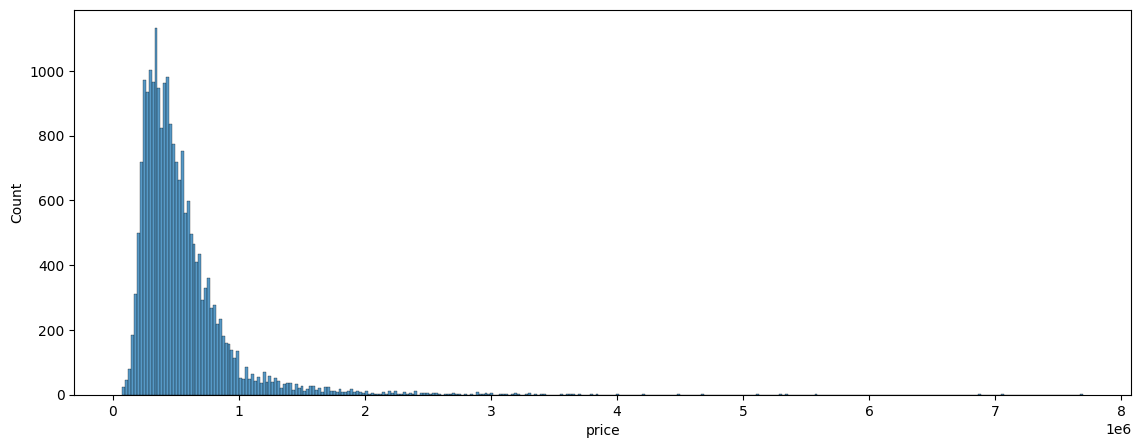

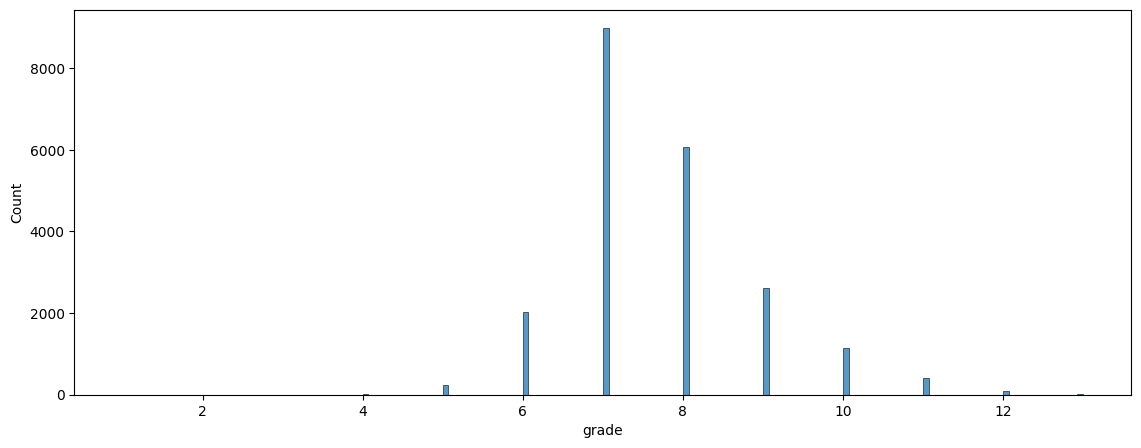

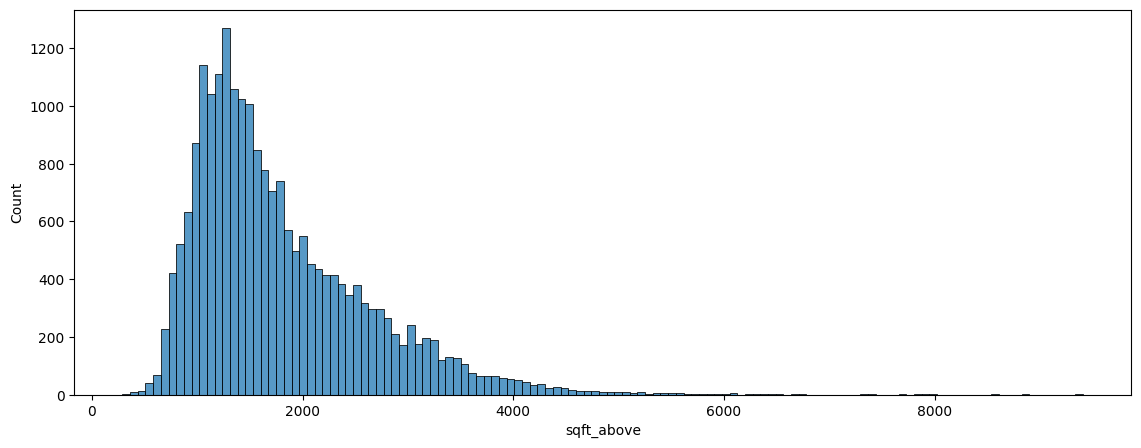

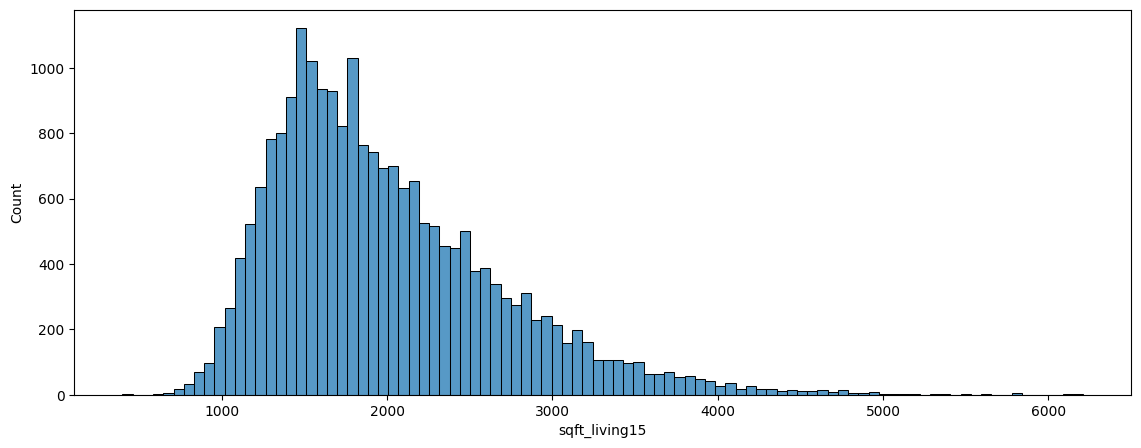

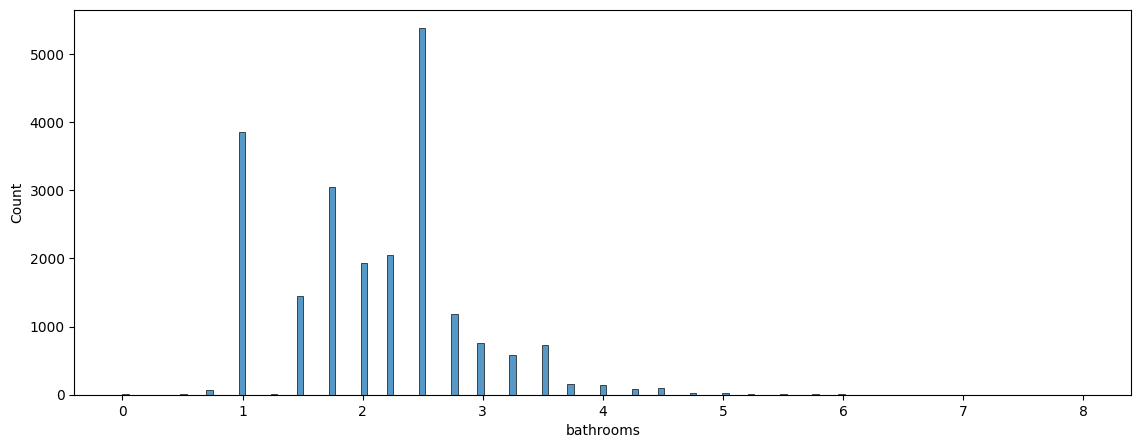

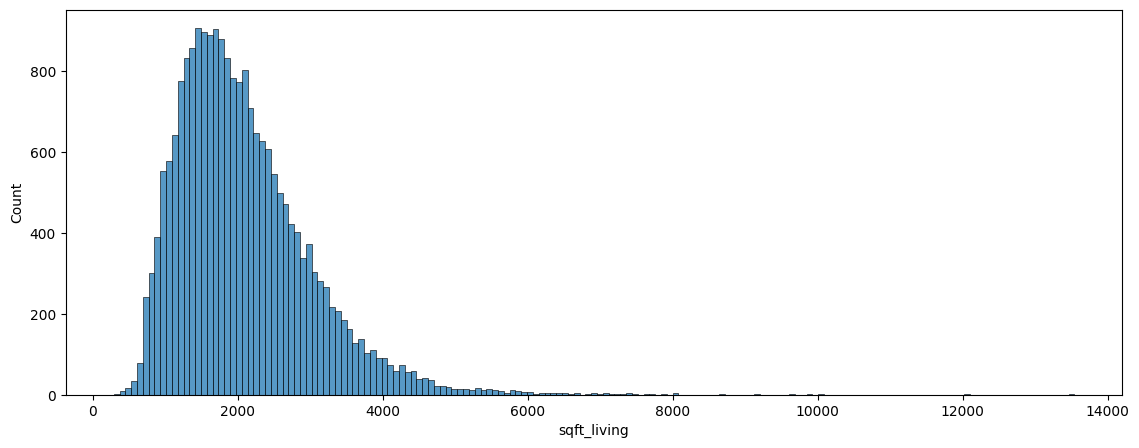

In [15]:
import warnings
relevant_col = ['price', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_living']
for column in relevant_col:
    warnings.filterwarnings('ignore')
    plt.figure(figsize=(30,5))
    plt.subplot(1,2,1)
    sns.histplot(housing_data[column], kde=False)

    plt.show()


Upon examining the histogram, it becomes clear that a substantial majority of housing prices fall below the 2 million mark, particularly within the grade range of 5 to 11. The square footage of living space (sqft_living and sqft_living15) is predominantly concentrated within the 500 to 5000 range. Moreover, the distribution of the number of bathrooms reveals that the majority of houses possess between 1 to 5 bathrooms. In order to facilitate further analysis, it is necessary to eliminate outliers and refine the dataset based on these observed trends.

In [16]:
import numpy as np

criteria = (housing_data['price'] <= 2000000) & \
            (housing_data['grade'].between(6, 11)) & \
            (housing_data['sqft_above'].between(500, 4500)) & \
            (housing_data['sqft_living15'].between(500, 4500)) & \
            (housing_data['bathrooms'].between(1, 5))

filtered_data = housing_data.loc[criteria]
filtered_data.shape

(20896, 20)

# Split Data


After completing the data cleaning, identifying the most influential variables, and handling outliers, our next step is to train the regression model. To initiate this process, we need to split our data into two sets: 'x' comprising predictor variables, which are the variables used for making predictions, and 'y' representing the target variable, which is the variable being predicted. For our analysis, the most relevant variables are designated as predictor variables, and 'price' is identified as our target variable.
 


In [17]:
x =  filtered_data[['grade', 'sqft_above', 'sqft_living15', 'bathrooms']]
y = filtered_data['price']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Linear Regression Model

Let's build the linear regression model and train it for the prediction.

In [19]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Evaluate the Model

After, bulding and training the model, it's time to evaluate our model. Now, we will thoroughly assess our model and proceed to visualize the results in the upcoming task.<br><br>The coefficient of determination provides insights into the goodness of fit of our regression model. Ranging from 0 to 1, the coefficient of determination signifies the model's quality, with higher values within this range indicating better performance.

In [20]:
lr.score(x_test, y_test)

0.46840503410499756

In [21]:
y_prediction = lr.predict(x_test)

In [22]:
lr_mse = mean_squared_error(y_test,y_prediction)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

r2 = r2_score(y_test, y_prediction)

n = len(y_test) 
p = x_test.shape[1]

# Calculate Adjusted R-squared
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Output the results
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {r2_adj:.4f}")


R-squared: 0.4684
Adjusted R-squared: 0.4679


Let's examine the coefficients of our model. Coefficient gives the estimated impact of each corresponding independent variable on the predicted price. 



In [23]:
coeff = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff

,Coefficient
grade,121239.663653
sqft_above,10.404431
sqft_living15,84.475045
bathrooms,23671.395720



Our model yields a coefficient of determination (R2) of 0.47, indicating a moderate fit. However, the root mean squared error (RMSE) is notably high, suggesting that our model does not align well with the data.<br>

Several factors could contribute to the lower R2 value. Firstly, the presence of nonlinearity in the relationship between predictor and target variables may be influencing the model's performance. Given that our model assumes linearity, a nonlinear true relationship could lead to suboptimal fitting.<br>

Furthermore, the omission of some variables with potential impacts on the target variable during the variable selection process might contribute to the model's limitations. It's essential to ensure comprehensive coverage of influential variables.<br>

Additionally, the dataset's size might play a role in the model's suboptimal performance. A larger dataset could potentially enhance the model's ability to generalize and improve its predictive accuracy.<br>


To visualize our results, we'll create plots showcasing our predictions alongside the test data. A more linear distribution in these plots indicates a better fit of the model. Additionally, examining the skewness of our model is valuable; improving the model could result in a bell-shaped curve, signifying a more normal distribution of the data. This observation underscores the need for enhancements in our model.

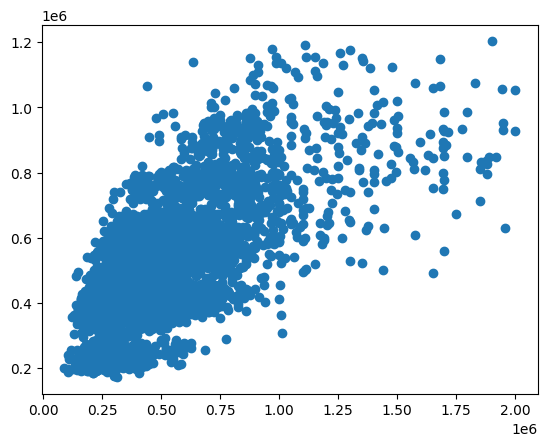

In [24]:
plt.scatter(y_test, y_prediction)

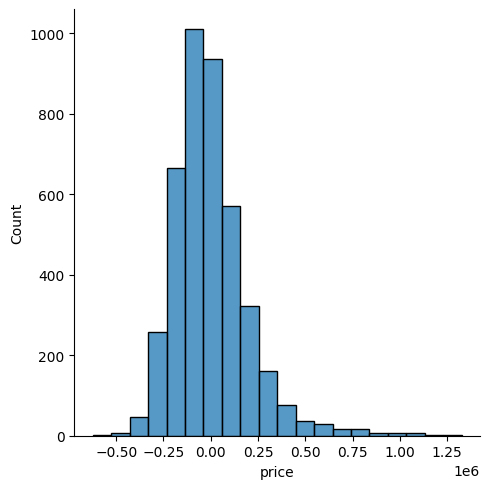

In [25]:
sns.displot((y_test-y_prediction),bins=20)
plt.show()

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [27]:

df = housing_data
relevant_col = ['grade', 'sqft_above', 'sqft_living15', 'bathrooms']


X = df[relevant_col] 
y = df['price']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:
# Instantiatimg PolynomialFeatures with degree 2 (quadratic features)
poly = PolynomialFeatures(degree=2)

# Fitting and transform the training data (generating polynomial features)
X_train_poly = poly.fit_transform(X_train)

# Transforming the test data (using the same transformation as the training data)
X_test_poly = poly.transform(X_test)


In [30]:
# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [31]:
# Predicting on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

n = len(y_test)  
p = X_test.shape[1]  

# Calculate Adjusted R-squared
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Output the results
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {r2_adj:.4f}")



Mean Squared Error: 67215476259.04152
Root Mean Squared Error: 259259.4767005471
R-squared: 0.5553847199372932
R-squared: 0.5554
Adjusted R-squared: 0.5550


# Logarithmic Transformation

In [32]:
import numpy as np

y_log = np.log1p(y)  


In [33]:

X_log = X.copy()
relevant_col = ['grade', 'sqft_above', 'sqft_living15', 'bathrooms']

# Apply logarithmic transformation to selected features

X_log['grade'] = np.log1p(X_log['grade'])
X_log['sqft_above'] = np.log1p(X_log['sqft_above'])
X_log['sqft_living15'] = np.log1p(X_log['sqft_living15'])
X_log['bathrooms'] = np.log1p(X_log['bathrooms'])



In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = model.predict(X_test)

# Evaluate the model using RMSE and R-squared
mse = mean_squared_error(y_test, y_pred_log)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_log)

# Convert the predicted log-transformed values back to the original scale
y_pred = np.expm1(y_pred_log) 
y_test_actual = np.expm1(y_test)  

# Evaluate the model with actual prices (in the original scale)
mse_actual = mean_squared_error(y_test_actual, y_pred)
rmse_actual = np.sqrt(mse_actual)
r2_actual = r2_score(y_test_actual, y_pred)

# Output the results
print(f"RMSE (log-transformed scale): {rmse}")
print(f"R-squared (log-transformed scale): {r2}")
print(f"RMSE (original scale): {rmse_actual}")
print(f"R-squared (original scale): {r2_actual}")


n = len(y_test) 
p = X_test.shape[1]  

# Calculate Adjusted R-squared
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Output the results
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {r2_adj:.4f}")


RMSE (log-transformed scale): 0.3654552710180654
R-squared (log-transformed scale): 0.5314276119852408
RMSE (original scale): 279791.18788340595
R-squared (original scale): 0.4821748161568661
R-squared: 0.5314
Adjusted R-squared: 0.5310


# Conclusion

The analysis conducted showed that the polynomial transformation to 2 degree performed better in fitting to the data. 